# IS 445 - Final Project
# PEER

Some background. I have recently taken a machine learning class and there were many aspects of the course which required visualizations to function. Therefore, I utilized the same dataset repository they used for their homework demonstrations in this project. I also have nightmares cleaning data from poorly maintained CSV files from STAT 107, and the datasets on the UC Irvine Repo are well manicured and proven to function. These datasets are also used on the most widely available Python machine learning library, sklearn, which allowed me to import the dataset without the need to download it. While in the context of this project it may not be useful, this allows any code to run on the dataset even without a local copy of it.

## Dataset Information

Link: https://archive.ics.uci.edu/dataset/53/iris

Home Repo: https://archive.ics.uci.edu/

Python Library: https://scikit-learn.org/stable/



## Part 1: Decision Tree Classification

### 1. Load the iris dataset and split it into a training set and testing set:

In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X = iris.data
Y = iris.target

n_samples = iris.target.shape[0]

print('Number of samples:', n_samples)
print('Input size:', X.shape)
print('Input feature names:', iris.feature_names)
print('Output size:', Y.shape)
print('Output classes:', iris.target_names)
print('\n')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("Training sets:", X_train.shape, Y_train.shape)
print("Testing sets:", X_test.shape, Y_test.shape)

Number of samples: 150
Input size: (150, 4)
Input feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Output size: (150,)
Output classes: ['setosa' 'versicolor' 'virginica']


Training sets: (120, 4) (120,)
Testing sets: (30, 4) (30,)


We can see that there will be 150 variables each with 4 features and all being classified into 1 of 3 classes.

We then split the data in an 8:2 ratio for the training set and testing set respectively.

### 2. Train the decision tree model

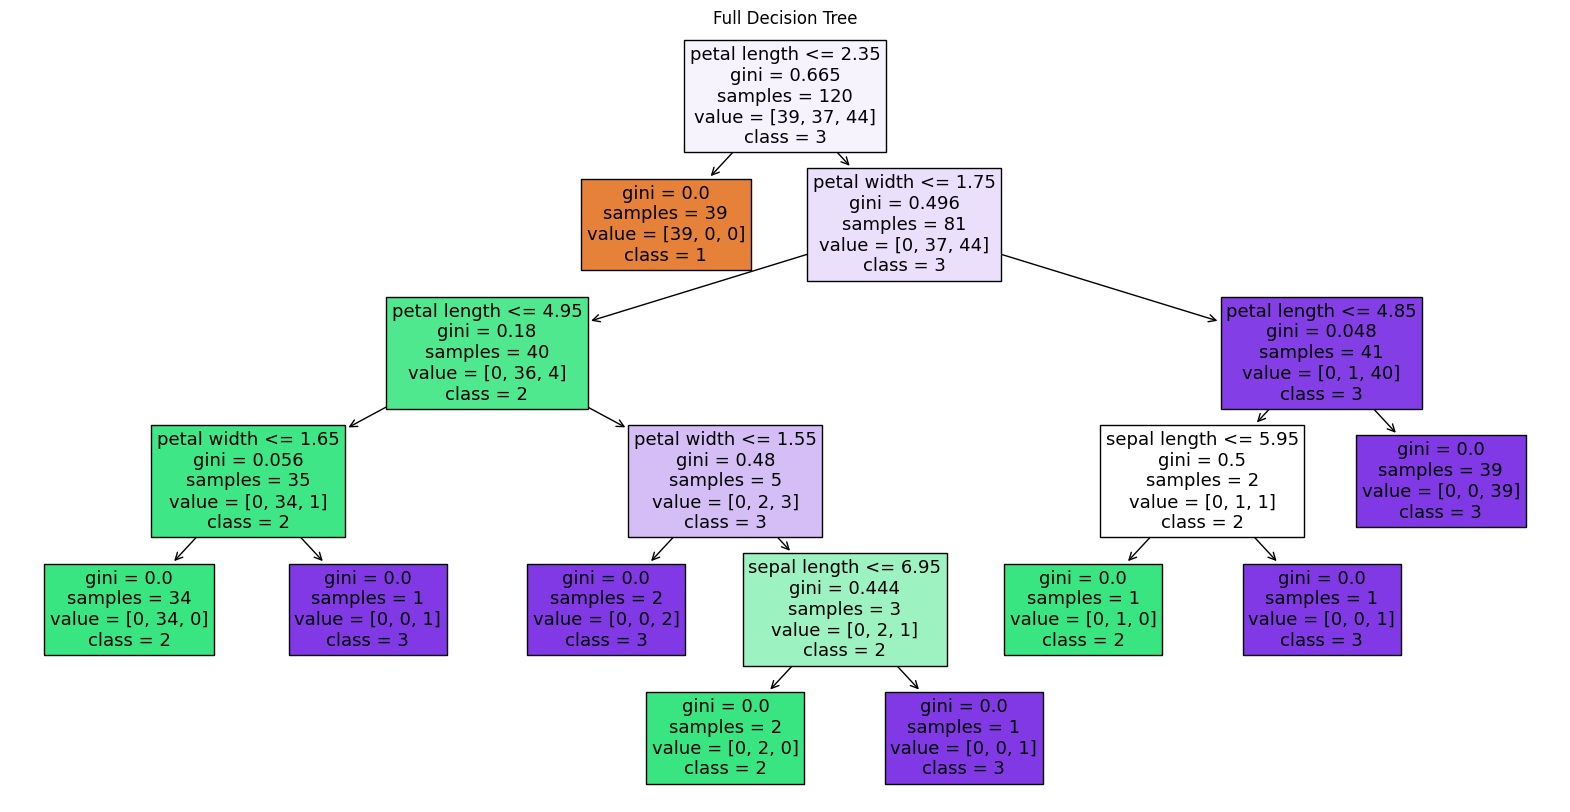

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, Y_train)

plt.figure(figsize=(20,10))
tree.plot_tree(dtree, feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'], 
               class_names=['1', '2', '3'], filled=True, fontsize=13)
plt.title('Full Decision Tree')
plt.show()

We see that a pretty complex tree is needed for the basic decision tree model to reach 100% accuracy. However this is what we call, "overfitment". Basically, the vast majority of the input values are correctly categorized by the depth level of 3. The last 5 misclassified values of the 120 that we started with in the training set take the remaining 2 levels of depth to sort out. That means the last 5 / 120 = 4.2% of data needs an additional 12 steps out of the 17 total steps to sort out, very wasteful and not neccearily more accurate for different sets of iris data. We should be aiming for somewhere between 90% - 95% accuracy.

To remedy this, we take a simimlar approach to selecting our hyperparameter as we did for the KNN Classification and Gradient-Descent. In this case, our hpyerparameter for the decision tree is its maximum depth (max-depth).

### 3. Overfitting and max-depth selection

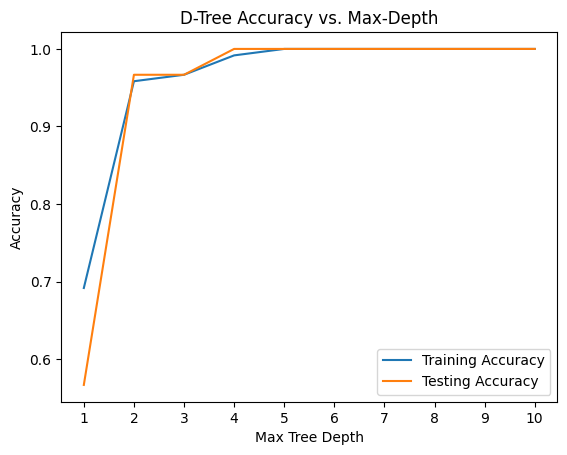

In [32]:
from sklearn.metrics import accuracy_score

train_acc = []
test_acc = []
dtree_list = []

max_depth_range = range(1, 11)
for max_depth in max_depth_range:
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    dtree = dtree.fit(X_train, Y_train)
    dtree_list.append(dtree)

    Y_train_pred = dtree.predict(X_train)
    accuracy = accuracy_score(Y_train, Y_train_pred)
    train_acc.append(accuracy)
    
    Y_test_pred = dtree.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_test_pred)
    test_acc.append(accuracy)
    
plt.plot(max_depth_range, train_acc, label="Training Accuracy")
plt.plot(max_depth_range, test_acc, label="Testing Accuracy")
plt.xticks(max_depth_range)
plt.title('D-Tree Accuracy vs. Max-Depth')
plt.xlabel("Max Tree Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We see that the the best max-depth value for the decision tree is 3, being that it is both acccurate enough and not wasteful with time and resources.

### 4. Building the ideal decision tree

We can then build the decision tree with the max depth in mind to show how quickly and efficiently it can classify the data.

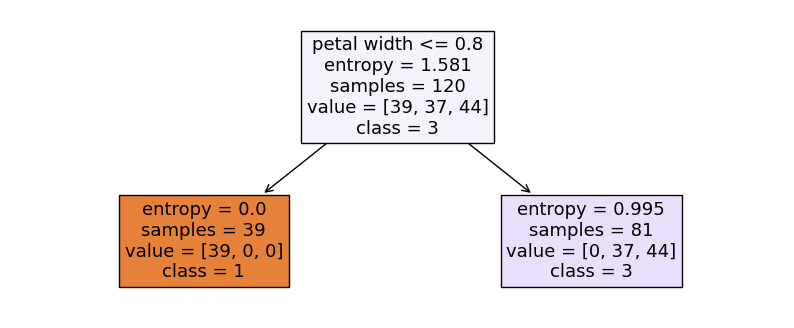

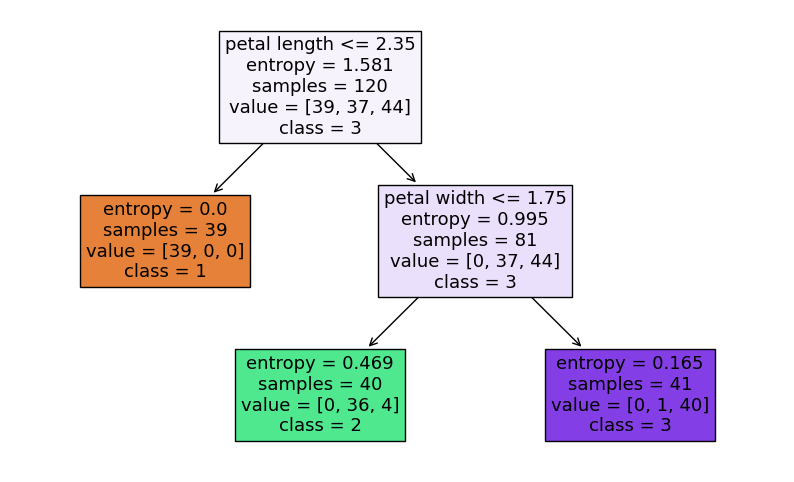

In [33]:
fig_length = [4, 6]
for i in range(2):
    dtree = dtree_list[i]
    plt.figure(figsize=(10,fig_length[i]))
    tree.plot_tree(dtree, feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'], 
                   class_names=['1', '2', '3'], filled=True, fontsize=13)
    plt.show()